### Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/games.csv')

### Подготовим данные

#### Приведем столбцы к нижнему регистру

In [2]:
data.columns = data.columns.str.lower()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработаем пропуски при необходимости

In [3]:
import numpy as np

#Определим, в каких столбцах есть пропуски. Для этого пройдемся циклом по каждому столбцу датафрейма и посчитаем в 
#каждом пропущенные значения

#for column in data:
#    print(f'В столбце {column} количество пропущенных значений:{data[column].isna().sum()}')



#В столбце 'year_of_release' отсутствует 269 значений. Найти им эквивалентное значение мы не можем. 
#Заполнять графу года нулями тоже некорректно. Поэтому придется удалить эти строки. Благо, значений немного.
#Кроме этого столбец находится в формате float. Нахождение в нем значений NaN затрудняет перевод в формат int.

#d1 = data.query('genre.isna()')
#d1.tail(20)
#В столбце 'genre' отсутствует всего 2 значения. Эти строки почти бесполезны: у них отсутствуют рейтинги и название.
#Их тоже можно удалить. 
#После удаления исчезли пропуски в столбце name. Значит это были одни и те же строки. Убили двух зайцев одной пулей

data = data.dropna(subset=['year_of_release','genre'])



#d1 = data.query('critic_score.isna()')

#В датафрейме существует 6534 строк, в которых одновременно пропущены значения столбцов 'critic_score', 
#'user_score', 'rating' 

#Оставим пропуски, как есть




#В столбце 'user_score' присутствует значение 'tbd'. Вероятно, это значения, которые необходимо было уточнить.
#Так или иначе заменим их на NaN. Количество пропусков примерно равно половине значений столбца 'user_score'.
#Заменять их на медианные значения не имеет в данном случае смысла
#Эти данные необходимо уточнить. Пока оставим пропуски
for d in data['user_score']:
    data.loc[(data['user_score'] == 'tbd'), 'user_score'] = np.nan


#data['rating'].unique()   
    
#Так же у нас остались пропуски в столбце 'rating'. Значения этого столбца категориальные. Никаких подсказок в имеющемся
#датафрейме относительно пересечения этих данных с данными любого другого столбца отсутствуют.
#Эти данные необходимо уточнить. Пока оставим пропуски
   

Мы удалили значения в столбцах 'year_of_release' и 'genre'. Их было немного и заполнить их самостоятельно было проблематично. В столбце 'user_score', мы заменили его на NaN, так как это скорее всего данные, которые хотели уточнить. В конечном итоге пропуски в critic_score', 'user_score' и 'rating' мы решили оставить по тем или иным причинам. Стоит уточнить эти данные.


#### Преобразуем данные в нужные типы

In [30]:
#Преобразуем данные в нужные типы year_of_release, critic_score и user_score

data['year_of_release'] = data['year_of_release'].astype('int32')

data['critic_score'] = data['critic_score'].fillna(0)
data['critic_score'] = data['critic_score'].astype('int32')

data['user_score'] = data['user_score'].astype('float32')


#### Посчитаем суммарные продажи во всех регионах и запишем их в один столбец

In [5]:

data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']


### Проведем исследовательский анализ данных


#### Посмотрим, сколько игр выпускалось в разные годы

<AxesSubplot:>

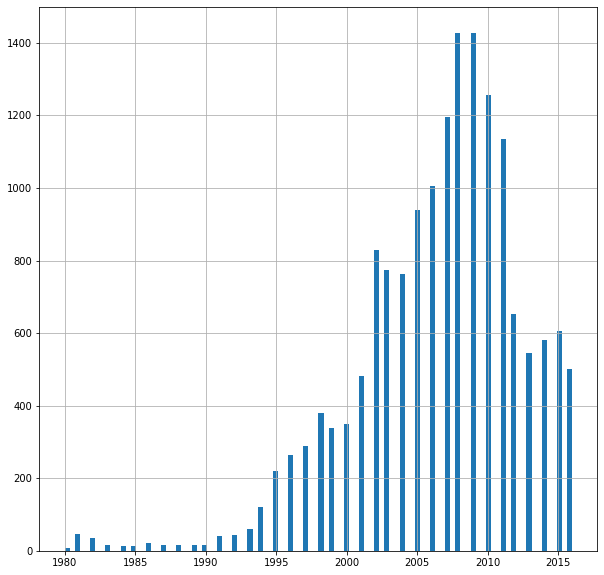

In [6]:
data['year_of_release'].hist(bins=100, figsize=(10,10))

График наклонен влево. Особый рост выпуска видеоигр наблюдается с 1994 года. До этого количество выпускаемых видеоигр не превышало 50 единиц. Возможно, в данной динамике значениями до 1994 года можно пренебречь по причине их малого количества и слабой изменяемостью: рынок видеоигр еще не сформировался, поэтому особых факторов роста или падения там не выделить.

Наблюдается пик с максимальным значением в 2008-2009 годах. Было выпущено более 1400 видеоигр. Заметно сильное падение после 2011 года. Количество игр с 2011 заметно уменьшилось

#### Выберем платформы с наибольшими суммарными продажами

<AxesSubplot:xlabel='platform'>

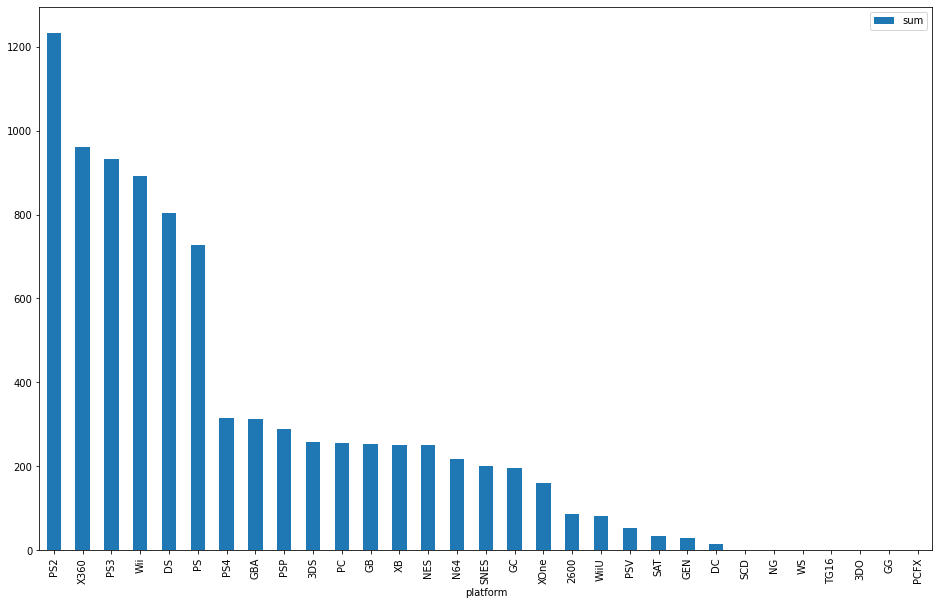

In [7]:
(
    data
    .groupby('platform')['all_sales']
    .agg({'sum'})
    .sort_values(by = 'sum', ascending = False)
    
).plot(y = 'sum', kind = 'bar', figsize=(16,10))

В данном случае платформами с наибольшей суммой продажи будут те платформы, сумма продаж которых больше 600 млн, а именно это будут: PS DS Wii PS3 X360 PS2 3DS PC

##### Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

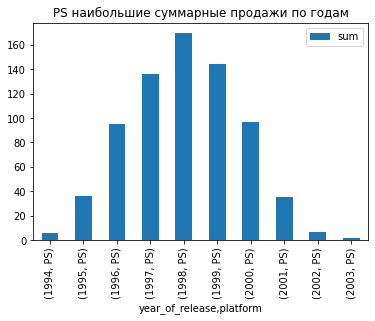

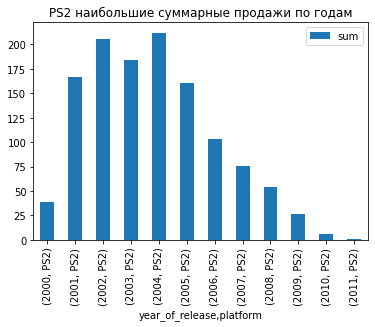

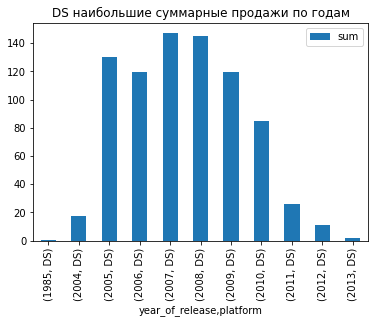

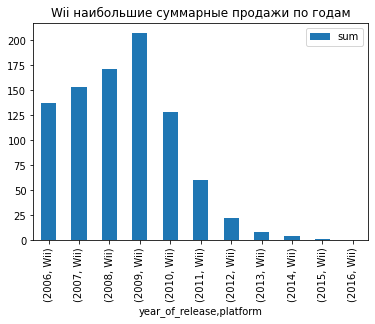

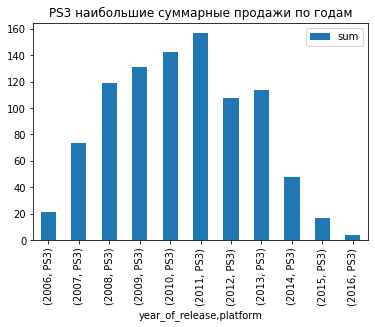

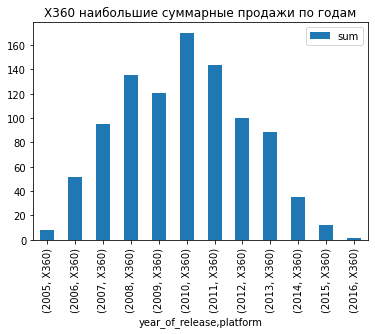

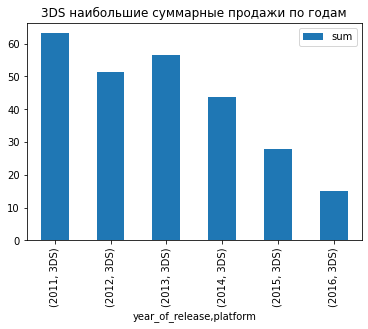

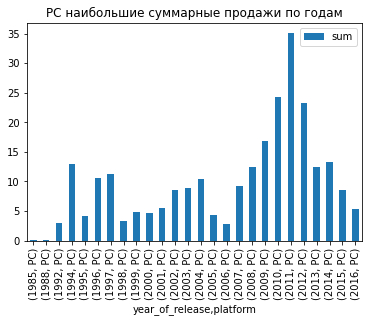

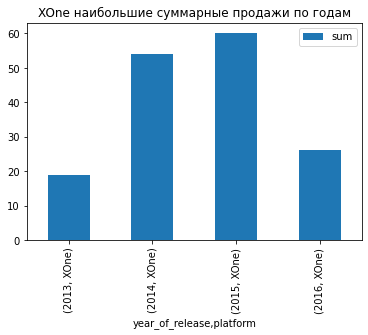

In [8]:
import matplotlib.pyplot as plt

for i in ["PS","PS2","DS","Wii","PS3","X360","3DS","PC","XOne"]:
    (
    data
    .query('platform in @i')
    .groupby(['year_of_release','platform'])['all_sales']
    .agg({'sum'})
    .sort_values(by = 'year_of_release')
    
    ).plot(y = 'sum', kind = 'bar')
    plt.title(f'{i} наибольшие суммарные продажи по годам')


В целом наблюдая за количеством продаж игр на каждую из 5 самых продаваемых, мы увидели что с 2010 года спрос на видеоигры либо начинал падать, либо приближался к нулю(что можно заметить на PS 2 и на DS, скорее всего спроса на них нет после 2011 - 2013). Игры на PS 1 же и вовсе перестали покупать после 2003. Срок жизни каждой приставки - не более 11 лет

Оставим для исследований только платформы 'X360', 'PS3', 'Wii', '3DS', 'PC', 'XOne'. Это единственные платформы, у которых есть хоть какая-то информация по продажам в мире после 2013 года. Будет некорректно оставить остальные, так как мы не сможем построить для них прогноз на 2017 год. Скорее всего 

Информацию будем брать в периоде 2011 - 2016 годов - наш актуальный период

#### Из выбранных нами приставок обратимся к следующим:

Wii - с 2011 года заметно сильное падение продаж. К 2016 количество продаж стремится к нулю

PS3 - с 2011 года заметен небольшой рост в 2013 году, но к 2016 году продажи сильно упали. Нуля они не достигли, но они не превышают 5 миллионов

X360 - с 2011 года продажи падают, 2013 падение немного снизилось, а после опять продолжило падать. В 2016 году число продаж не превысило 3-4 миллионов

3DS - достаточно новая приставка. Данные в принципе имеются только с 2011 года. Продажи так же падают, хотя в 2013 году был небольшой прирост. К 2016 же году продажи не превысили 15 миллионов

PC - в целом количество продаж не высокое, если сравнивать с предыдущими. Заметно падение продаж с 2011 года. В 2013 небльшой рост. В 2016 году число продаж не превысило 5 миллионов

XOne - еще одна новая приставка. Общее число продаж невысоко. В 2013 году были самые низкие продажи. В 2014-2015 году наблюдался заметный рост. К 2016 году продажи упали, однако, они достигли 25 миллионов. На данный момент из всех приставок - у этой самые большие продажи в 2016 году.

#### Построим график ящик с усами по глобальным продажам игр в разбивке по платформам


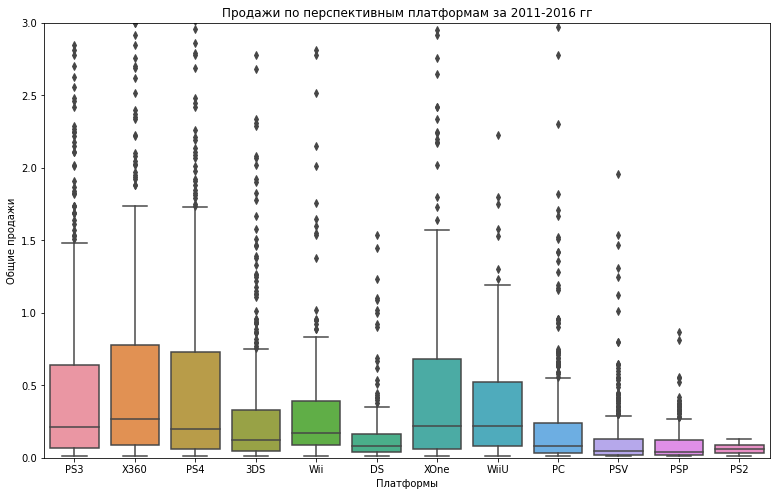

In [9]:
import seaborn as sns
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data.query('year_of_release >= 2011'), y = 'all_sales', x='platform')
    .set(title = 'Продажи по перспективным платформам за 2011-2016 гг', xlabel = 'Платформы', 
         ylabel = 'Общие продажи', ylim=(0, 3)))

plt.show()

Wii - На графике продаж игр на платформу Wii заметны аномальные значения около 10 и 7 миллионов что вполне может быть реальными данными), а так же ряд значений после 1 миллионов, но скорее всего это отдельная категория игр.

PS3 - У PS3 заметны аномальные значения более 20 миллионов и от 13 до 14 миллионов, а так же ряд значений после 4го квартиля. У этой приставки присутствует самая продаваемая видеоигра с количеством проданных копий более 20 миллионов. Игрой с таким суммарным количеством является Grand Theft Auto V. Данные верны, в новостях сказано, что копии этой видеоигры в принципе превысили 80 миллионов. Так что вбросов на наших графиках нет

X360 - У X360 заметны выделяющиеся значения в диапазоне от 8 до 11 миллионов и от 13 до 17

3DS - У платформы 3DS после 6 миллионов значения продаж начинают распределяться боле редко

PC - У платформы PC значения продаж начинают выделяться после 2 миллионов. Крайним является значение после 5 миллионов

XOne - У платформы XOne значения продаж начинают выделяться после 4 миллионов. Крайним является значение более 7 миллионов продаж

Общий вывод по ящикам с усами: судя по всему, у каждой приставки видеоигры делятся, как минимум на две категории: обычные и те, у кого количество продаж сильно превышает общую тенденцию. На границе, примерно от 4 до 10 миллионов  у каждой приставки диапазон между ближайшими значениями продаж резко вырастает. Крайние значения некоторых видеоигр доходят до 20 миллионов

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

Text(0.5, 1.0, 'Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы PS3')

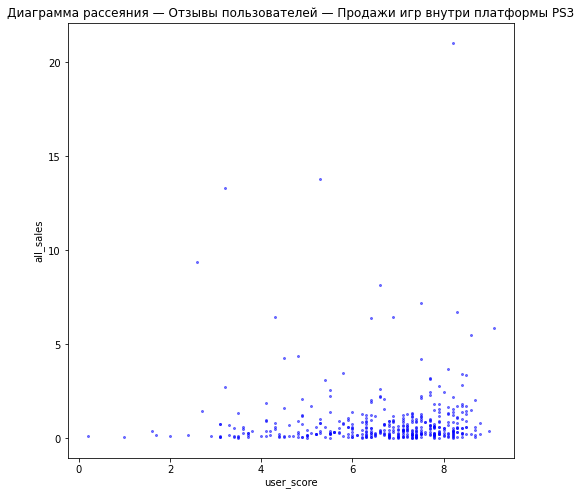

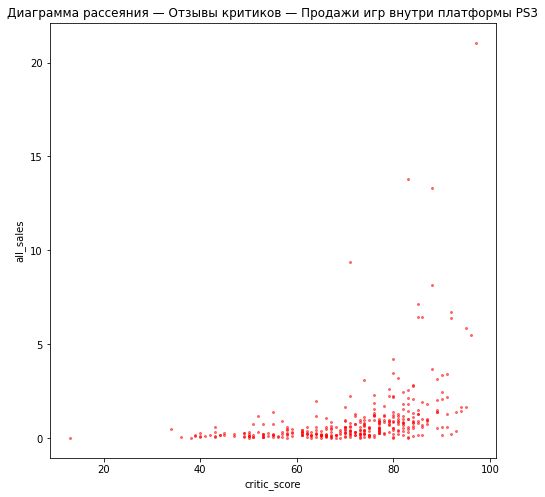

In [10]:
#Сохраним срез данных с 2011 года в переменной data_new
data_new = data.query('year_of_release >= 2011')

#В качестве самой популярной приставки выберем PS3
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

(
    data_new
    .query('platform in "PS3"')
    
).plot(kind='scatter',
        y='all_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Отзывы пользователей — Продажи игр внутри платформы PS3')
#максимум 10


(
    data_new
    .query('platform in "PS3"')
    
).plot(kind='scatter',
        y='all_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы PS3')
#максимум 100



Мы можем наблюдать, что у платформы PS3 на обоих графиках чем большее количество самих видеоигр, тем лучше у них оценки. Заметно, что игры этой платформы любят как критики, так и пользователи. На графике зависимости критиков от количества продаж особой корреляции не прослеживается, а вот на оценках пользователей, вполне заметно, что особо выделяющиеся экзмепляры, пользующиеся заметной популярностью, в свою очередь, имеют достаточно высокие оценки пользователей.

##### Посмотрим, как влияют на продажи внутри остальных популярных платформ отзывы пользователей и критиков

Text(0.5, 1.0, 'Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы Wii')

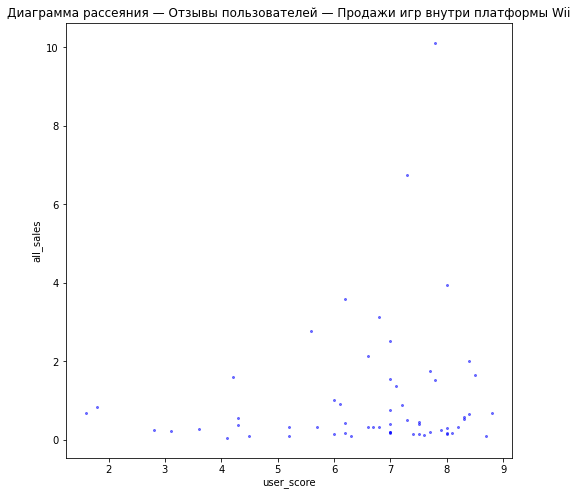

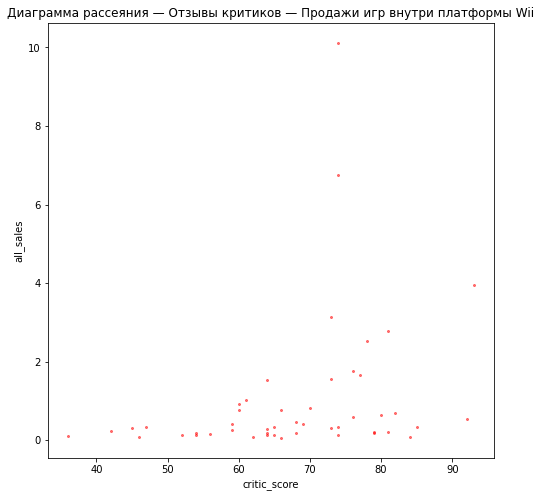

In [11]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами приставки Wii


(
    data_new
    .query('platform in "Wii"')
    
).plot(kind='scatter',
        y='all_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Отзывы пользователей — Продажи игр внутри платформы Wii')
#максимум 10


(
    data_new
    .query('platform in "Wii"')
    
).plot(kind='scatter',
        y='all_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы Wii')
#максимум 100

На диаграммах рассеяния платформы Wii между продажами и отзывами в обоих графиках заметна прямая корреляция. В целом количество отзывов на игры этой приставки раскинуты немного хаотично. Но хорошие отзывы перевешивают.

Text(0.5, 1.0, 'Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы X360')

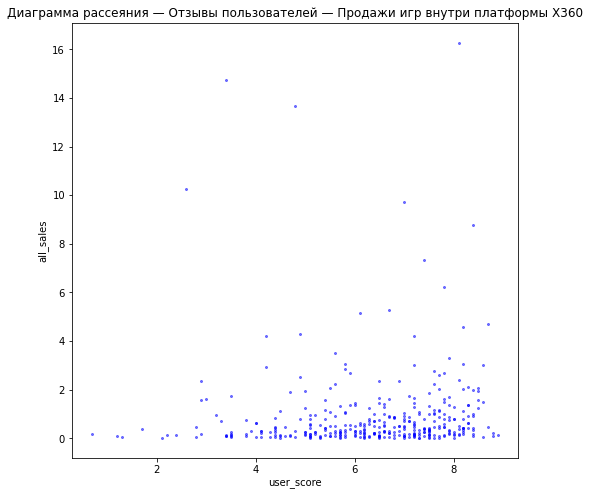

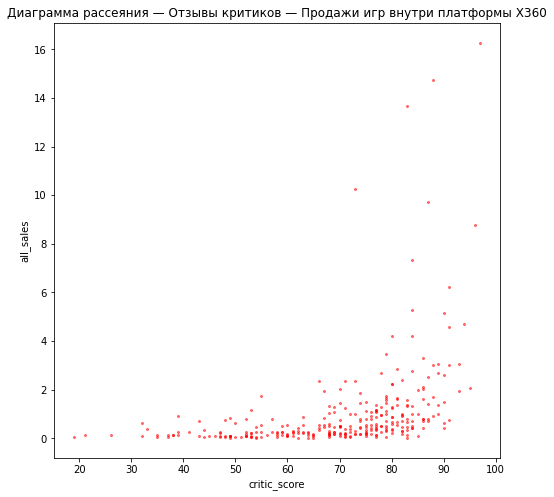

In [12]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами приставки X360


(
    data_new
    .query('platform in "X360"')
    
).plot(kind='scatter',
        y='all_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Отзывы пользователей — Продажи игр внутри платформы X360')
#максимум 10


(
    data_new
    .query('platform in "X360"')
    
).plot(kind='scatter',
        y='all_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы X360')
#максимум 100

На диаграммах рассеяния платформы X360 заметна прямая корреляция. Большая часть значений раскидана среди хороших оценок

Text(0.5, 1.0, 'Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы 3DS')

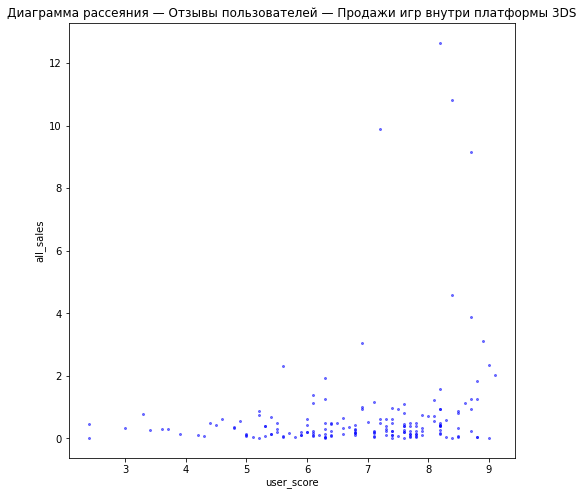

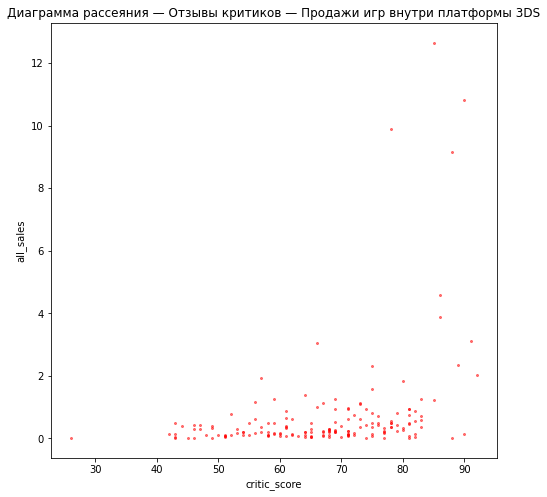

In [13]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами приставки 3DS


(
    data_new
    .query('platform in "3DS"')
    
).plot(kind='scatter',
        y='all_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Отзывы пользователей — Продажи игр внутри платформы 3DS')
#максимум 10


(
    data_new
    .query('platform in "3DS"')
    
).plot(kind='scatter',
        y='all_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы 3DS')
#максимум 100

На платформе 3DS заметна небольшая прямая корреляция. На графике критиков так же присутствует значительное количество пропущенных значений

Text(0.5, 1.0, 'Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы PC')

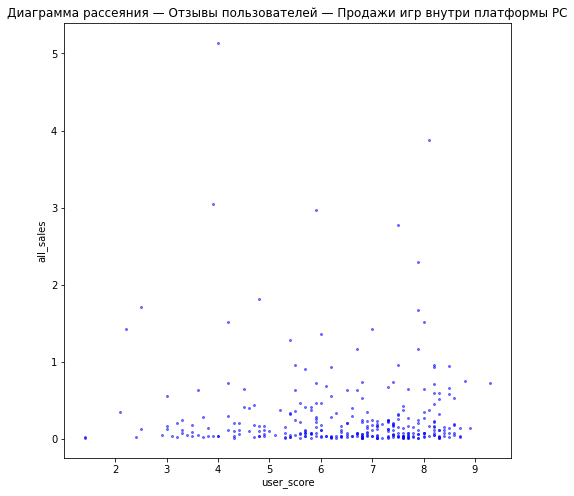

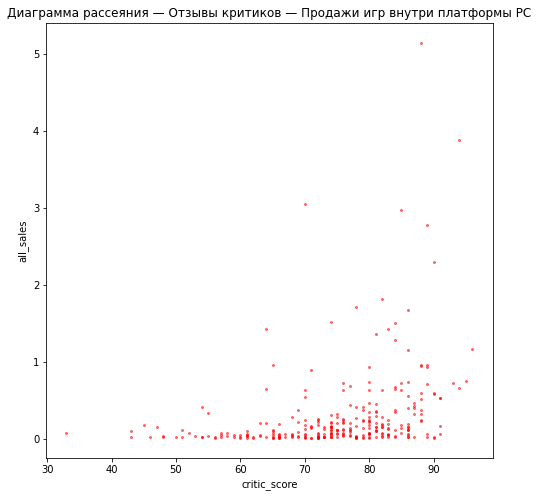

In [14]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами приставки PC


(
    data_new
    .query('platform in "PC"')
    
).plot(kind='scatter',
        y='all_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Отзывы пользователей — Продажи игр внутри платформы PC')
#максимум 10


(
    data_new
    .query('platform in "PC"')
    
).plot(kind='scatter',
        y='all_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы PC')
#максимум 100

На платформе PC прямая корреляция присутствует только на графике критиков. В целом на игры отзывы скорее положительные

Text(0.5, 1.0, 'Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы XOne')

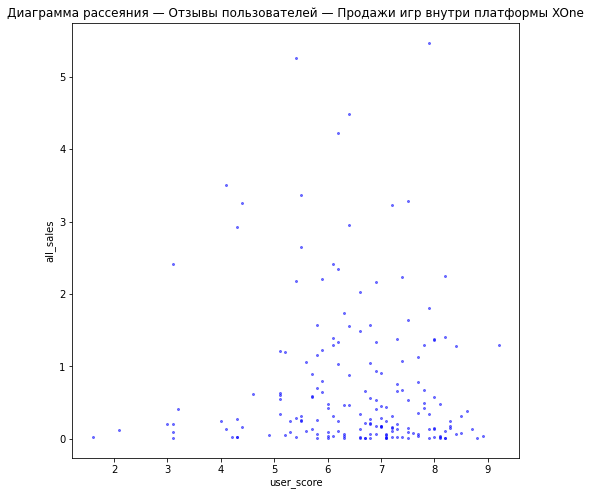

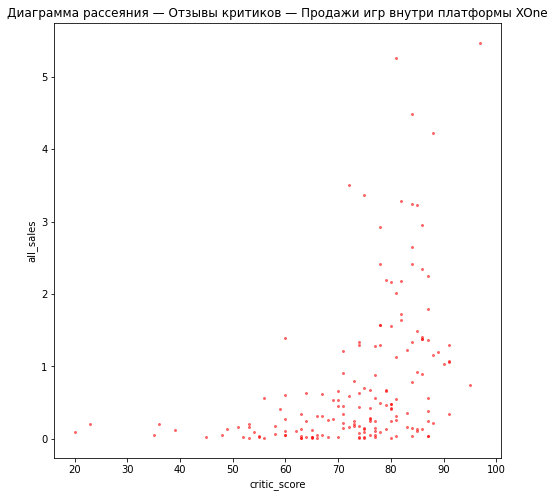

In [15]:
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами приставки XOne


(
    data_new
    .query('platform in "XOne"')
    
).plot(kind='scatter',
        y='all_sales' , x='user_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'b', s = 4)
plt.title('Диаграмма рассеяния — Отзывы пользователей — Продажи игр внутри платформы XOne')
#максимум 10


(
    data_new
    .query('platform in "XOne"')
    
).plot(kind='scatter',
        y='all_sales' , x='critic_score', alpha=0.5, subplots=True, figsize=(8,8), c = 'r', s = 4)
plt.title('Диаграмма рассеяния — Отзывы критиков — Продажи игр внутри платформы XOne')
#максимум 100

На платформе XOne прямая корреляция присутствует только на графике критиков. На графе пользователей значения разбросаны хаотично. В целом на игры отзывы скорее положительные

#### Соотнесем выводы с продажами игр на других платформах

У вышеописанных платформ на диаграмме рассеивиния критиков всегда заметная прямая корреляция между оценками критиков и количеством продаж. У пользователей же мнение чаще разнится, но в целом их хорошая оценка чаще совпадает с числом продаж

#### Посмотрим на общее распределение игр по жанрам

In [16]:
import seaborn as sns

<AxesSubplot:xlabel='genre'>

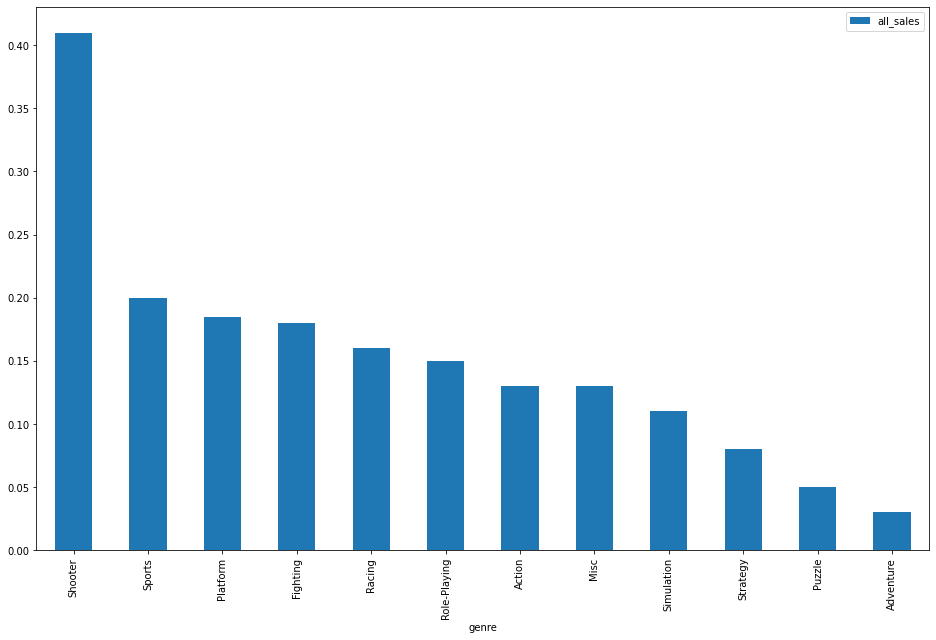

In [17]:
(
    data_new
    .pivot_table(values='all_sales', index='genre', aggfunc='median')
    .sort_values(by = 'all_sales', ascending = False)
    .plot(kind = 'bar', figsize=(16,10))

)

Вывод об общей прибыли распределения игр по жанрам: 

Количество продаж по жанрам определенно отображают жанры видеоигр. В принципе все жанры так или инае отличаются друг от друга по продажам. Мы наблюдаем на графике достаточно ровную градацию от самых популярных жанров, до непопулярных.
Жанр Shooter самый востребованный. Он вдвое больше следующего за ним Sports

### Составим портрет пользователя каждого региона

In [18]:
#Функция для постройки графиков по жанрам и платформам с 2011 года

def region_criteria(data, region, criteria):
    some_stats = data.query('year_of_release >= 2011').pivot_table(index=criteria, \
                                  values=[region, 'name'], \
                                  aggfunc={region:'sum', 'name': 'count'}).\
sort_values(region, ascending=False).head()
    some_stats.columns = [region, 'number of titles']
    display(some_stats)
    some_stats.plot(kind='pie', y=region, title=f'Топ 5 значений столбца {criteria} для региона {region} в 2011-2016', \
                    figsize=(8,8))
    plt.show()

#Функция для постройки графиков по возрастному рейтингу с 2011 года
    
def region_criteria_2(data, region, criteria):
    some_stats = data.query('year_of_release >= 2011').pivot_table(index=criteria, \
                                  values=[region, 'name'], \
                                  aggfunc={region:'sum', 'name': 'count'}).\
sort_values(region, ascending=False)
    some_stats.columns = [region, 'number of titles']
    display(some_stats)
    some_stats.plot(kind='pie', y=region, title=f'Топ 5 значений столбца {criteria} для региона {region} в 2011-2016', \
                    figsize=(8,8))
    plt.show()  

#Функция для постройки графиков по возрастному рейтингу до 2011. Она строится исключительно ради моего интереса:
#Хочу узнать, как сильно менялись возрастные рейтинги до 2011 года
    
def region_criteria_2_new(data, region, criteria):
    some_stats = data.query('year_of_release < 2011').pivot_table(index=criteria, \
                                  values=[region, 'name'], \
                                  aggfunc={region:'sum', 'name': 'count'}).\
sort_values(region, ascending=False)
    some_stats.columns = [region, 'number of titles']
    display(some_stats)
    some_stats.plot(kind='pie', y=region, title=f'Топ 5 значений столбца {criteria} для региона {region} в 2011-2016', \
                    figsize=(8,8))
    plt.show() 
    

#Функция для постройки графиков по жанрам до 2011. Она строится исключительно ради моего интереса:
#Хочу узнать, как сильно менялись жанры до 2011 года

    
def region_criteria_new(data, region, criteria):
    some_stats = data.query('year_of_release < 2011').pivot_table(index=criteria, \
                                  values=[region, 'name'], \
                                  aggfunc={region:'sum', 'name': 'count'}).\
sort_values(region, ascending=False).head()
    some_stats.columns = [region, 'number of titles']
    display(some_stats)
    some_stats.plot(kind='pie', y=region, title=f'Топ 5 значений столбца {criteria} для региона {region} в 2011-2016', \
                    figsize=(8,8))
    plt.show() 
    

#### Определим для пользователя каждого региона самые популярные платформы

,na_sales,number of titles
platform,,
X360,226.80,498
PS3,168.26,708
PS4,108.74,392
XOne,93.12,247
3DS,82.65,512


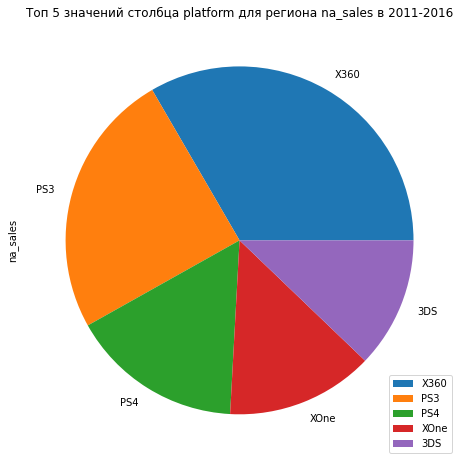

,eu_sales,number of titles
platform,,
PS3,163.10,708
PS4,141.09,392
X360,117.10,498
3DS,61.27,512
PC,56.70,389


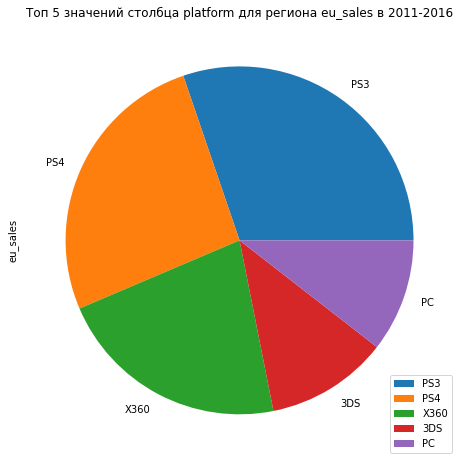

,jp_sales,number of titles
platform,,
3DS,100.62,512
PS3,49.39,708
PSP,24.04,312
PSV,21.84,429
PS4,15.96,392


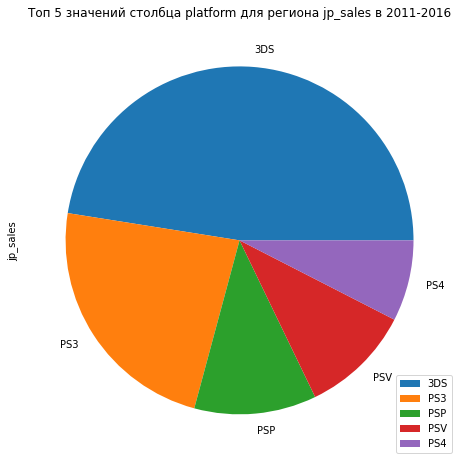

In [19]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_criteria(data, region, 'platform')

Вывод:

В Северной Америке на первом месте по продажам X360, она занимает большую долю приставок, почти сразу же за ним идет PS3 - так же выделяется среди других приставок, почти сразу же за ним идет PS3, далее идет PS4, XOne, 3DS - примерно равные между собой

В Европе на первом же месте PS3 -довольно сильно выделяется среди других платформ, далее идет PS4 и X360 -примерно равные друг другу,далее идет Wii, и PS -тоже равные друг другу. PS4 и PS3 вместе занимают половину от всех продаж.

В Японии на первом месте DS -занимает примерно половину от всех продаж. Её очень любят. На втором месте тоже выделяется среди оставшихся - PS3. Остальные PSP,PSV,PS4 - разделены поровну


Во всех регионах выделяется платформы PS3. Они уверенно держатся во всех регионах. Можно сказать, что в каждом регионе есть своя любимая платформа:
В Америка больше всего любят X360, в Европе PS3, напополам с PS4(стоит отметить, что это приставки одной фирмы), в Японии -3DS 

#### Определим для пользователя каждого региона самые популярные жанры

,na_sales,number of titles
genre,,
Action,230.92,1269
Shooter,194.43,329
Sports,108.70,389
Role-Playing,83.78,465
Misc,69.69,375


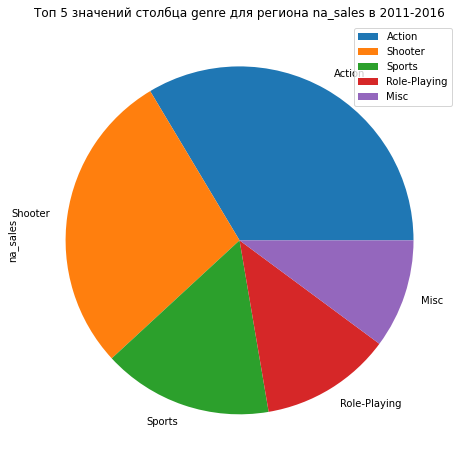

,eu_sales,number of titles
genre,,
Action,199.12,1269
Shooter,148.02,329
Sports,88.48,389
Role-Playing,62.30,465
Racing,40.58,180


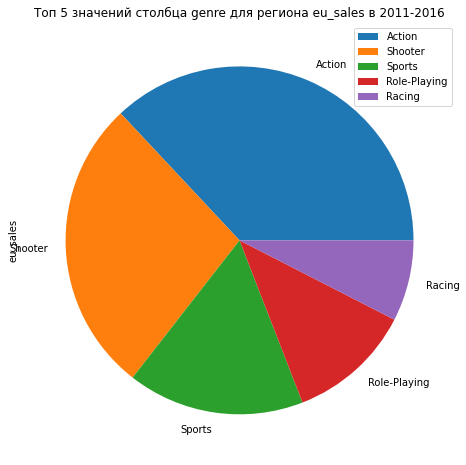

,jp_sales,number of titles
genre,,
Role-Playing,79.87,465
Action,63.62,1269
Misc,17.60,375
Fighting,12.38,159
Platform,12.13,122


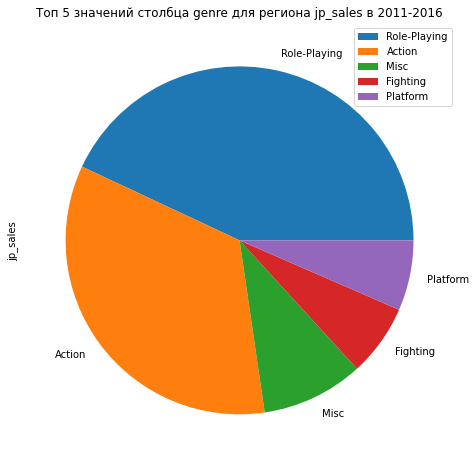

In [20]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_criteria(data, region, 'genre')

В Северной Америке и в Европе на первом месте одинаковое распределение:сначала идет Action, далее рядом с ним всегда идет Shooter, вместе с которым они занимают большую часть продаж, далее идет Sports, Role-Playing, а на пятом месте либо Racing, либо Misc

В Японии же картина сильно отличаеся: Role-Playing и Action в наполовину делят объем 3/4 всех продаж. У них так же выделяется жанр Platform и Fighting

Общий вывод: Самым популярным и часто встречающимся у всех регионов можно назвать жанр Action. В Европе и Северной Америке так же популярен жанр Shooter, а в Японии вместо него предпочитают Role-Playing.

#### Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе

,na_sales,number of titles
rating,,
M,308.45,622
E,170.17,618
E10+,117.72,456
T,109.31,616
EC,0.42,1
RP,0.00,1


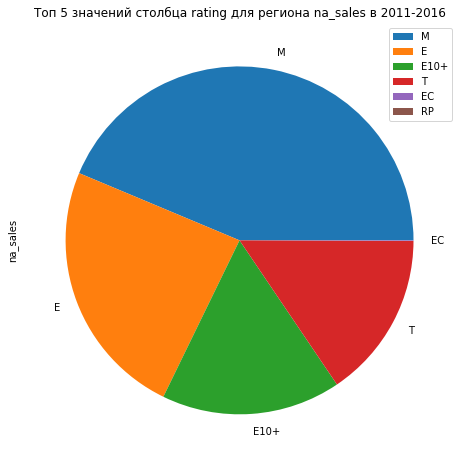

,eu_sales,number of titles
rating,,
M,250.26,622
E,141.73,618
T,83.16,616
E10+,78.00,456
RP,0.03,1
EC,0.00,1


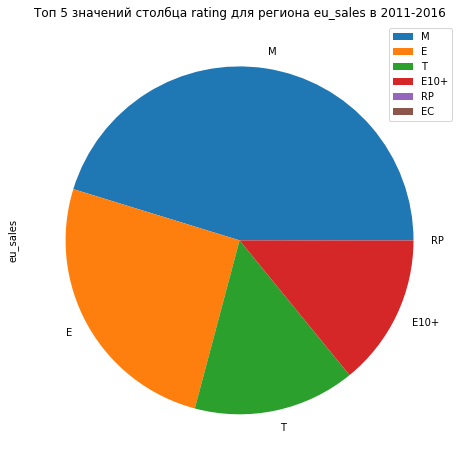

,jp_sales,number of titles
rating,,
E,36.68,618
T,33.39,616
M,26.14,622
E10+,11.23,456
EC,0.00,1
RP,0.00,1


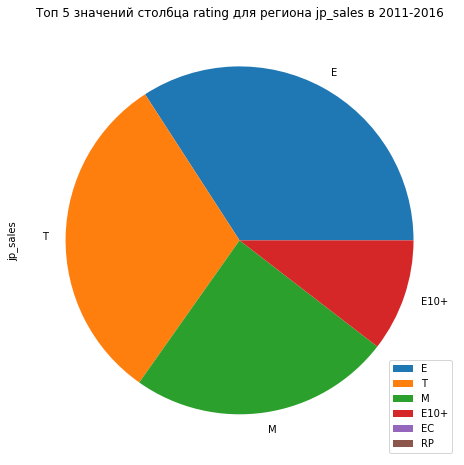

In [21]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_criteria_2(data, region, 'rating')

Вывод:

В Европе и в Северной Америке картина практически одинаковая: на первом месте игры для лиц страше 17 лет, на втором месте игры для всех, далее идут игры для тинейджеров и ожидаемые проекты

В Японии же картина другая: на первом месте E, далее идет T, потом M, затем E10+, а вот все остальные рейтинги имеют очень малое число продаж. Другими словами: Игры для тинейджеров составляют большую долю вместе с играми для всех. Игры для взрослых же не составляют такую большую долю, как в Европе и в Северной Америке.

##### Дополнительное, необязательное исследование. Проверим, какого было разделение по рейтингам в разных регионах до 2011 года

,na_sales,number of titles
rating,,
E,1104.07,3303
T,638.29,2289
M,434.44,914
E10+,227.78,937
K-A,2.56,3
AO,1.26,1
EC,1.11,7


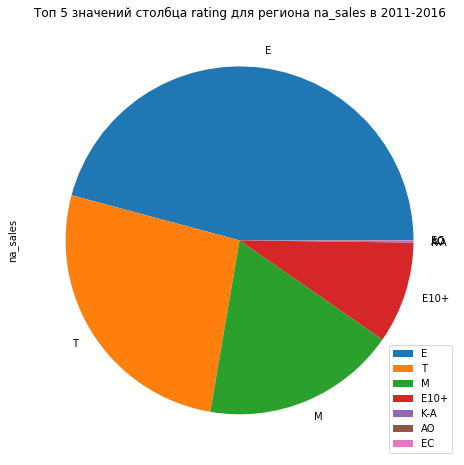

,eu_sales,number of titles
rating,,
E,562.14,3303
T,338.63,2289
M,229.74,914
E10+,105.35,937
AO,0.61,1
K-A,0.27,3
EC,0.11,7


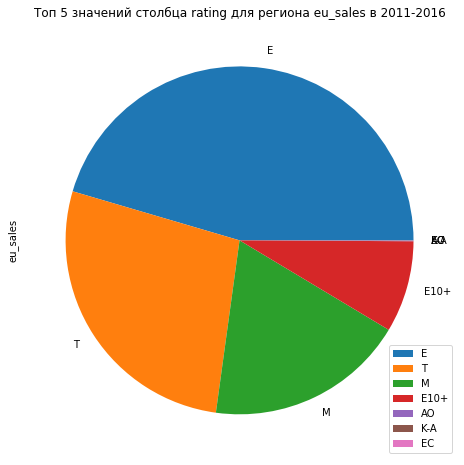

,jp_sales,number of titles
rating,,
E,161.28,3303
T,117.31,2289
M,37.44,914
E10+,28.97,937
K-A,1.46,3
AO,0.00,1
EC,0.00,7


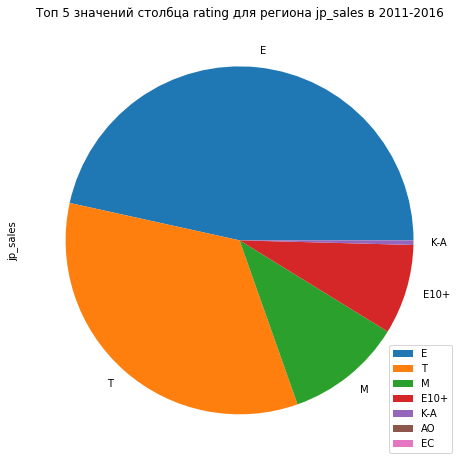

In [22]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_criteria_2_new(data, region, 'rating')

Интересный факт: распределение возрастных рейтингов  до 2011 года было точно таким же, как в Японии после 2011 года. Преобладали видеоигры для всех и видеоигры для тинейджеров. В то же время игры для взрослых даже близко не преобладали так, как они преобладают в Европе и Северной Америке после 2011 года.

,na_sales,number of titles
genre,,
Action,632.25,2038
Sports,562.50,1917
Platform,406.16,756
Shooter,390.40,967
Misc,329.88,1346


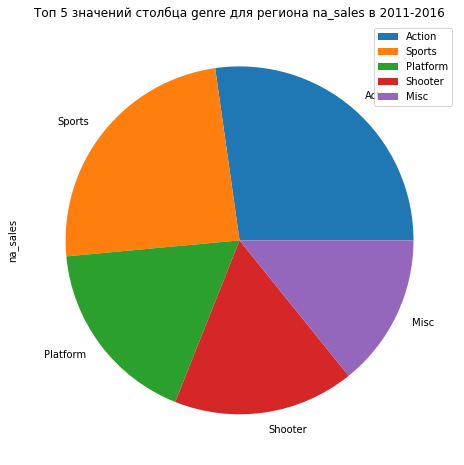

,eu_sales,number of titles
genre,,
Action,311.87,2038
Sports,282.85,1917
Racing,193.91,1046
Misc,170.88,1346
Platform,169.32,756


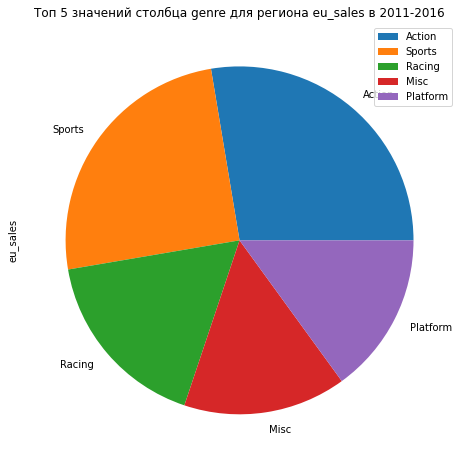

,jp_sales,number of titles
genre,,
Role-Playing,273.52,1016
Sports,123.84,1917
Platform,118.58,756
Action,96.52,2038
Misc,89.42,1346


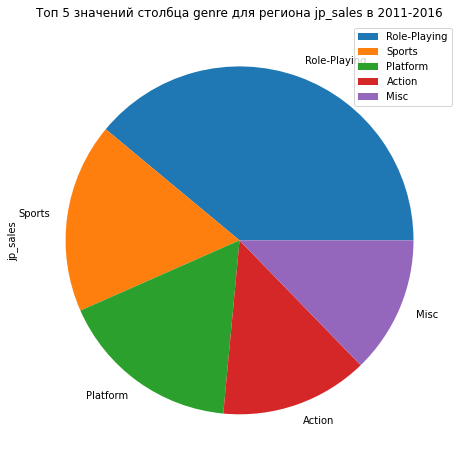

In [23]:
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    region_criteria_new(data, region, 'genre')

Любопытно. Жанр шутер совсем немного распространет только в Северной Америке. Однако наличие высоковозрастных рейтингов в тот период не наблюдается. Может ли так быть, что развитие и распространение жанра шутер привело к росту числа рейтингов для взорслых? Если так, то почему в Японии этот жанр вообще не прижился, а сильно укоренился именно жанр Role-Playing?

#### Общий вывод по регионам

Общий вывод: Заметно, что Японские потребители заметно отличаются от потребителей Европы и Северной Америки. Предпочтительные любимые приставки у каждого региона свои(хотя все в одинаковой доле предпочитают PS3). А вот соотношение рейтингов в Японии сильно отличается от рейтингов Европы и Америки, так же отличаются предпочтительные жанры в Японии от других регионов. В Японии спрос на игры для взрослых низок, по сравнению с Европой и Северной Америкой. Так же в Японии вовсе отсутвутет спрос на Shooter, вместо него у них преобладает жанр Role-Playing. Стрелялки более агресивны и скорее получат возрастное ограничение, чем видеоигры, основанные на настольных играх. Однако, отсутствие вовсе жанра Shooter в Японии как популярного наталкивает на мысль, что рынок видеоигр в Японии очень сильно отличается от остальных двух.

PS. Полезно будет уточнить, что распределение возрастных рейтингов сильно изменилось в Европе и Северной Америке после 2011 года, а в Японии осталось таким же

### Проверим гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H₀: средние пользовательские рейтинги платформ Xbox One и PC равны друг другу

Альтернативная гипотеза H₁: средние пользовательские рейтинги платформ Xbox One и PC различаются между собой

In [24]:
from scipy import stats as st

In [25]:
data_new = data.query('year_of_release >= 2011')

s1 = data_new[data_new['platform'] == 'XOne']['user_score'].array
s2 = data_new[data_new['platform'] == 'PC']['user_score'].array

alpha = .05

#equal_var укажем как False, потому что мы точно знаем, что выборки не равны между собой
results = st.ttest_ind(s1, s2, equal_var=False,nan_policy='omit')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.613069731351119
Не получилось отвергнуть нулевую гипотезу


Вывод: нам не удалось опровергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC равны друг другу

#### Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза H₀: рейтинги жанров Action и Sports разные

Альтернативная гипотеза H₁: рейтинги жанров Action и Sports одинаковые

In [26]:
data_new = data.query('year_of_release >= 2011')

s1 = data_new[data_new['genre'] == 'Action']['user_score'].array
s2 = data_new[data_new['genre'] == 'Sports']['user_score'].array

alpha = .05

#equal_var укажем как False, потому что мы точно знаем, что выборки не равны между собой
results = st.ttest_ind(s1, s2, equal_var=False,nan_policy='omit')


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 8.28582847479976e-19
Отвергаем нулевую гипотезу


Вывод: нам удалось опровергнуть гипотезу, что рейтинги жанров Action и Sports разные. 

### Общий вывод.

Мы проделали достаточно серьезную работу. 

Подготовили данные. Привели столбцы к нижнему регистру, обработали пропуски, преобразовали данные в нужные типы и записали суммарные продажи по всем регионам в отдельный столбец 'all_sales'.

Провели исследовательский анализ данных. Посмотрели, сколько игр выпускалось в разные годы. Увидели, что в 2008-2009 больше всего видеоигр выпускалось, а дальше был спад. Среди платформ выбрали самые максимальные по своим продажам, это: Wii, PS3, X360, 3DS, PC, XOne. А так же мы решили анализировать данные за актуальный период с 2011 до 2016. 
Проанализировали выделяющиеся значения по этим приставкам и сделали вывод, что у каждой приставки видеоигры делятся, как минимум на две категории: обычные и те, у кого количество продаж сильно превышает общую тенденцию. На границе, примерно от 4 до 10 миллионов у каждой приставки диапазон между ближайшими значениями продаж резко вырастает. Крайние значения некоторых видеоигр доходят до 20 миллионов.
Увидели, как влияют на продажи внутри каждой популярной платформы отзывы пользователей и критиков: у вышеописанных платформ на диаграмме рассеивиния критиков всегда заметная прямая корреляция между оценками критиков и количеством продаж. У пользователей же мнение чаще разнится, но в целом их хорошая оценка чаще совпадает с числом продаж. Так же мы земетили, что в целом у всех видеоигр оценки скорее хорошие.
Посмотрели на общее распределение игр по жанрам. Жанр Shooter - самый востребованный.

Составили портрет пользователя каждого региона. Мы построили несколько функций для удобства работы. Заметно, что Японские потребители заметно отличаются от потребителей Европы и Северной Америки. Предпочтительные любимые приставки у каждого региона свои(хотя все в одинаковой доле предпочитают PS3). А вот соотношение рейтингов в Японии сильно отличается от рейтингов Европы и Америки, так же отличаются предпочтительные жанры в Японии от других регионов. В Японии спрос на игры для взрослых низок, по сравнению с Европой и Северной Америкой. Так же в Японии вовсе отсутвутет спрос на Shooter, вместо него у них преобладает жанр Role-Playing. Стрелялки более агресивны и скорее получат возрастное ограничение, чем видеоигры, основанные на настольных играх. Однако, отсутствие вовсе жанра Shooter в Японии как популярного наталкивает на мысль, что рынок видеоигр в Японии очень сильно отличается от остальных двух.
(Кроме того, выполнили небольшую дополнительную работу и узнали, что распределение возрастных рейтингов сильно изменилось в Европе и Северной Америке после 2011 года, а в Японии осталось таким же. Мы так же можем вспомнить, что после 2011 года было замечено резкое падение числа видеоигр. Если бы у нас была статистика внутреннего рынка в Японии, было бы интересно пронаблюдать: было ли падение количества выпускаемых видеоигр в Японии. Если нет, то возможно не последнюю роль в падении количества выпускаемых игр сыграло то, что жанр шутер начал поглащать остальные жанры, от туда такая тенденция по возрастным ограничениям. Кроме этого нам не следует забывать, что жанр шутер является самым популярным в мире. Конечно, если в Японии жанр Role-Playing так же поглотил остальные жанры, то это предположение неверно. Однако, стоит учитывать тот факт, что в Японии нет такого узконаправленного рынка, как в Европе и США, а потому популярность жанра Role-Playing скорее всего не оказала особого влияния на сужение возрастной категории(собственно, мы и увидели, что игр для взрослых в Японии производится мало). И это несмотря на то, что жанр Role-Playing развит в Японии сильнее чем в Европе и Штатах. Нужно уточнить данные по производству видеоигр в Японии по этому вопросу, тогда данные станут яснее)

Проверили гипотезы: нам не удалось опровергнуть гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC равны друг другу.
Также нам удалось опровергнуть гипотезу, что рейтинги жанров Action и Sports разные. Нужно понимать, что жанр Action превосходит жанр Sports по продажам. Причем как в сумме, так и во всех отдельных регионах.